In [9]:
import torch
from src.training.funsd import _funsd
import torch.nn as nn
from src.paths import CHECKPOINTS
from src.models.VGAE import GAE, GSage_AE
from src.data.Data_Loaders import FUNSD_loader

/home/nbiescas/miniconda3/envs/doc2graph/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
data = FUNSD_loader(train=False)

{   'FEATURES': {   'add_embs': True,
                    'add_eweights': True,
                    'add_fudge': True,
                    'add_geom': True,
                    'add_hist': True,
                    'add_visual': True,
                    'num_polar_bins': 8},
    'GRAPHS': {   'data_type': 'img',
                  'edge_type': 'fully',
                  'node_granularity': 'gt'},
    'LOADER': {   'src_data': 'FUNSD'}}


TEST


adding features: 100%|██████████| 50/50 [00:18<00:00,  2.64it/s]


In [15]:
data.graphs[0].ndata['label']

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 3, 0, 0,
        0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        2, 0, 0, 0, 3, 0, 0, 0, 2, 3, 3, 3, 0, 0, 0, 3, 3, 3, 0, 0, 3, 3, 3, 2,
        3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 3, 3, 3, 3, 3, 0,
        0, 0, 0, 0, 0, 2, 2])

In [6]:
import dgl
dgl.batch(data.graphs).ndata['feat'].shape

torch.Size([7406, 4])

In [7]:
a = dgl.batch(data.graphs).edata['weights']

In [14]:
import torch

# Assuming you have your tensor as 'input_tensor'
input_tensor = torch.randn(100, 3, 56)  # Replace this with your actual tensor

# Reshape the tensor to (100, 168)
output_tensor = input_tensor.view((input_tensor.size()[0], (input_tensor.size()[2] * 3)))# OR
# output_tensor = input_tensor.reshape(100, 168)

# Verify the shape
print(output_tensor.shape)


torch.Size([100, 168])


In [2]:
#Load the data
test_data = FUNSD_loader(train=True)

{   'FEATURES': {   'add_embs': True,
                    'add_eweights': True,
                    'add_fudge': True,
                    'add_geom': True,
                    'add_hist': True,
                    'add_visual': True,
                    'num_polar_bins': 8},
    'GRAPHS': {   'data_type': 'img',
                  'edge_type': 'fully',
                  'node_granularity': 'gt'},
    'LOADER': {   'src_data': 'FUNSD'}}




adding features: 100%|██████████| 149/149 [00:58<00:00,  2.55it/s]


In [3]:
# Load the weights of the model
layers_dimensions = (1756, 400, 200, 100)
model = GSage_AE(layers_dimensions)
state_dict = torch.load(CHECKPOINTS / 'qualitative_results.pth')
model.load_state_dict(state_dict)


Encoder: ModuleList(
  (0): SAGEConv(
    (feat_drop): Dropout(p=0.0, inplace=False)
    (fc_pool): Linear(in_features=1756, out_features=1756, bias=True)
    (fc_self): Linear(in_features=1756, out_features=400, bias=False)
    (fc_neigh): Linear(in_features=1756, out_features=400, bias=False)
  )
  (1): SAGEConv(
    (feat_drop): Dropout(p=0.0, inplace=False)
    (fc_pool): Linear(in_features=400, out_features=400, bias=True)
    (fc_self): Linear(in_features=400, out_features=200, bias=False)
    (fc_neigh): Linear(in_features=400, out_features=200, bias=False)
  )
  (2): SAGEConv(
    (feat_drop): Dropout(p=0.0, inplace=False)
    (fc_pool): Linear(in_features=200, out_features=200, bias=True)
    (fc_self): Linear(in_features=200, out_features=100, bias=False)
    (fc_neigh): Linear(in_features=200, out_features=100, bias=False)
  )
) 	Numb Layers: 4

Decoder: ModuleList(
  (0): SAGEConv(
    (feat_drop): Dropout(p=0.0, inplace=False)
    (fc_pool): Linear(in_features=100, out_fe

<All keys matched successfully>

In [4]:
# Graph to try
import dgl
graphs = dgl.batch(test_data.graphs)

# Send to the gpu
criterion = torch.nn.MSELoss()
model = model.to('cuda:0')
graphs = graphs.to('cuda:0')
feat  = graphs.ndata['feat'].to('cuda:0')

In [5]:
graphs.ndata['label'].unique()

tensor([0, 1, 2, 3], device='cuda:0')

In [6]:
# Calculate the prediction values
pred = model(graphs, feat)

### Emedding Visualization

In [25]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import dgl

def extract_embeddings(loader, model):
    model = model.to('cuda:0')
    graph = dgl.batch(loader.graphs).to('cuda:0')
    h = graph.ndata['feat'].to('cuda:0')
    for layer in model.encoder:
        h = layer(graph, h)
    
    val_embeddings = h
    labels = graph.ndata['label']
    return val_embeddings.cpu().detach().numpy(), labels.cpu().detach().numpy()
    
val_embeddings, labels = extract_embeddings(test_data, model)

t_sne = TSNE(n_components = 2, perplexity=45, n_iter=1000, init="pca")    
S_t_sne = t_sne.fit_transform(val_embeddings)


/home/nbiescas/miniconda3/envs/doc2graph/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/home/nbiescas/miniconda3/envs/doc2graph/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



In [26]:
fashion_mnist_classes = ["answer", "header", "other", "question"]
colors = ['#1f77b4', '#000000', '#2ca02c', '#d62728']

def plot_embeddings(embeddings, targets, xlim=None, ylim=None):
    plt.figure(figsize=(10,10))
    for i in range(4):
        inds = np.where(targets==i)[0]
        plt.scatter(embeddings[inds,0], embeddings[inds,1], alpha=0.5, color=colors[i], s=2)
    if xlim:
        plt.xlim(xlim[0], xlim[1])
    if ylim:
        plt.ylim(ylim[0], ylim[1])
    plt.legend(fashion_mnist_classes)
    

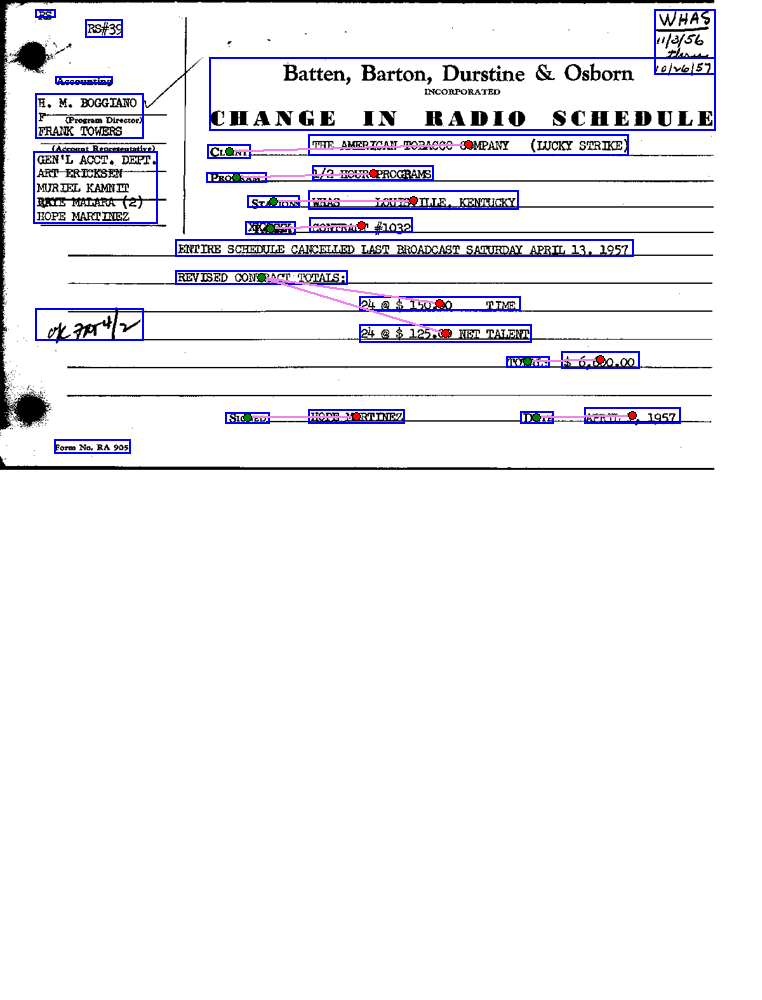

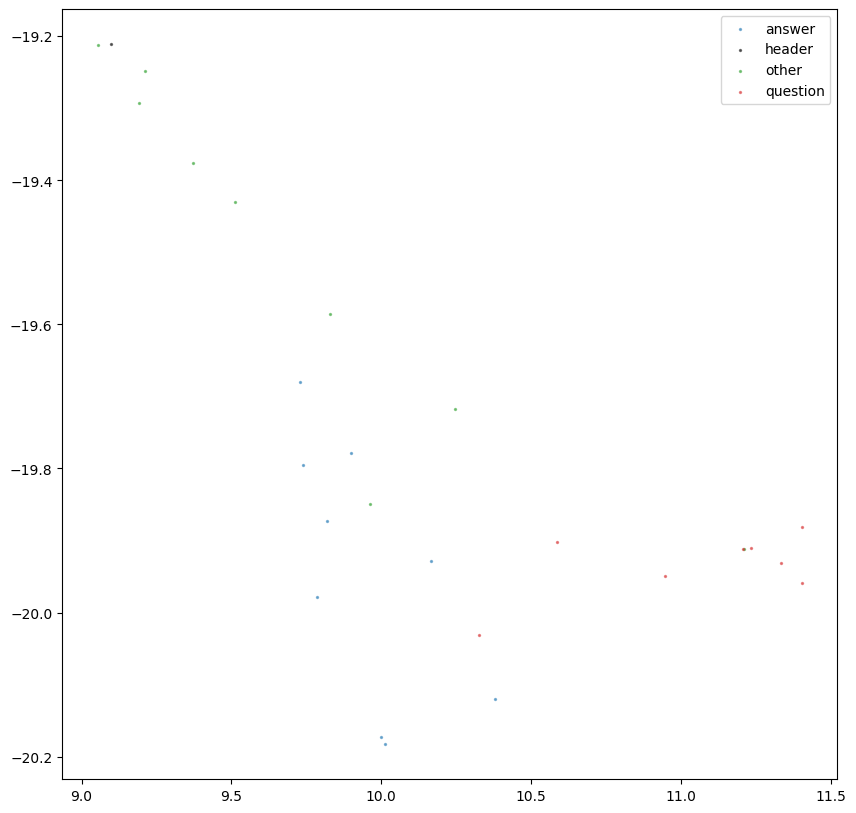

In [27]:
start = 0
num = 22
for i in range(num):
    start += test_data.graphs[i].num_nodes()

end = start + test_data.graphs[num].num_nodes()
test_data.graphs[num].num_nodes()
plot_embeddings(S_t_sne[start:end], labels[start:end])
test_data.print_graph(num)

In [1]:
import torch

/home/nbiescas/miniconda3/envs/doc2graph/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
l = torch.tensor([[6,7,8,9,10], [5, 5, 5, 6, 7]])
s = torch.tensor([[1,2,3,4,5], [2,3,4,5,6]])
torch.cat((l, s), dim=1)

tensor([[ 6,  7,  8,  9, 10,  1,  2,  3,  4,  5],
        [ 5,  5,  5,  6,  7,  2,  3,  4,  5,  6]])

In [2]:
from sklearn.cluster import KMeans
import numpy as np


a = np.random.rand(100, 2)

In [4]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(a)

In [20]:
a = kmeans.labels_
counts = np.bincount(a)
print(np.argmax(counts))

0


In [19]:
np.where(kmeans.labels_ == 0)[0]

array([ 6, 12, 14, 20, 27, 30, 37, 42, 45, 46, 48, 49, 51, 52, 56, 57, 59,
       61, 64, 65, 67, 69, 72, 73, 74, 78, 79, 84, 90, 92, 94])